In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('Mall_Customers.csv')
data.rename(columns={'Genre': 'Gender'}, inplace=True)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


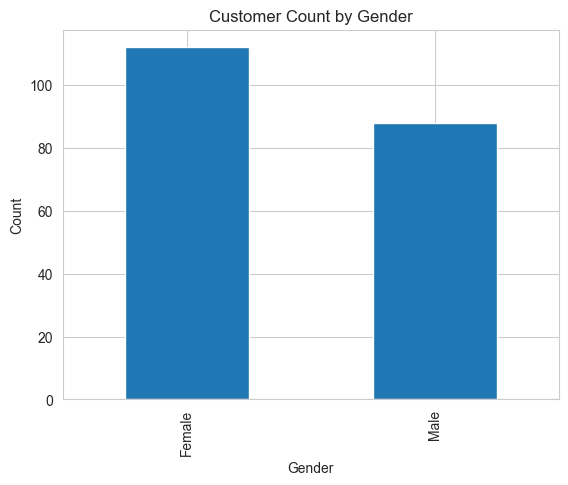

In [19]:
gender_data = data.groupby('Gender').size()
gender_data.plot(kind='bar')
plt.title('Customer Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

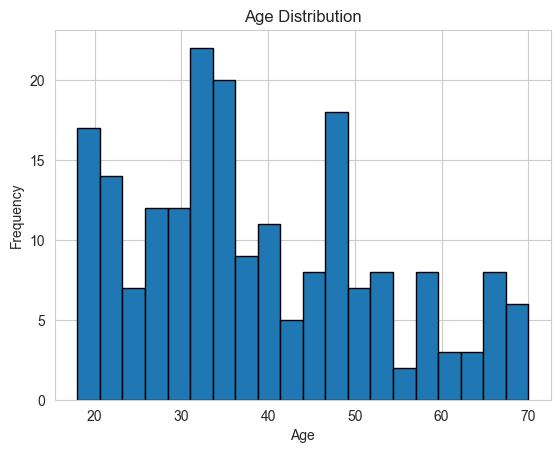

In [20]:
age_data = data['Age']
age_data.plot(kind='hist', bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

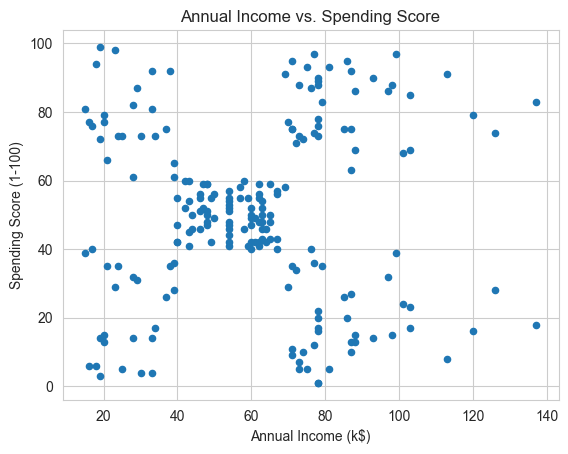

In [21]:
income_spending_data = data[['Annual Income (k$)', 'Spending Score (1-100)']]
income_spending_data.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Annual Income vs. Spending Score')
plt.show()

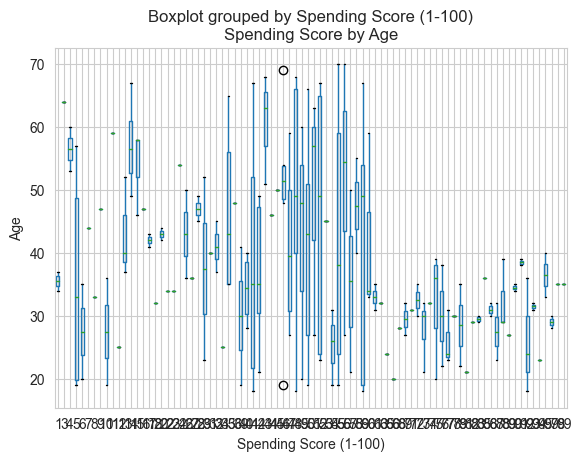

In [22]:
age_spending_data = data[['Age', 'Spending Score (1-100)']]
age_spending_data.boxplot(by='Spending Score (1-100)')
plt.title('Spending Score by Age')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


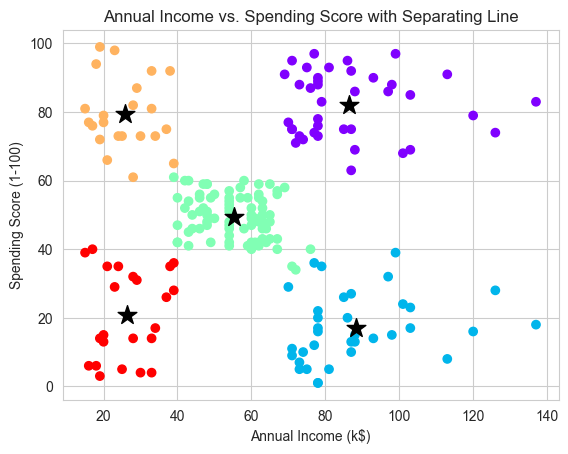

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(income_spending_data)
centers = kmeans.cluster_centers_
plt.scatter(income_spending_data['Annual Income (k$)'],
            income_spending_data['Spending Score (1-100)'],
            c=kmeans.labels_,
            cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='black')
plt.title('Annual Income vs. Spending Score with Separating Line')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()